#**Análise de renda com dados do IBGE 2015**
_____________________________

Alunos:

*   Êmily Eduarda;
*   Luiz Roberto;
*   Mateus Idibal;
*   Pedro Henrique Sena Lima;
*   Wesley Mendes;
*   William Silva.

## **Metodologia**

### **1) Entendendo o problema**

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente,características gerais da população como educação, trabalho, rendimento,habitação, entre outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

##### Descrição das variaveis:
- Renda: Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.
- Idade: Idade do morador na data de referência em anos.
- UF: estado onde reside o entrevistado.
- Sexo: masculino ou feminino.
- Anos de Estudo: quantidade de estudos em anos do entrevistado.
- Cor

Ao longo deste projeto serão  apresentados alguns dados e análises, além de conclusões com relação a distribuição de renda de pessoas que responderam a pesquisa em 2015.

Também será objetivado responder algumas perguntas, como:
- Quantas pessoas responderam a pesquisa?
- Qual a idade mínima e máxima?
- Qual a renda mínima e máxima?
- Quantas pessoas são do sexo masculino e feminino?
- Qual a cor mais protuberante dessas pessoas?
- Qual a renda média separando por sexo e cor?
- Qual a região com maior renda média e qual a com menor?

### **2) Entendendo os Dados**
Nessa etapa, pretende-se analisar e entender a natureza dos dados disponíveis, explorando sua estrutura, características e qualidade.



#### **2.1) Setup**

In [60]:
#Bibliotecas utilizadas
import pandas as pd  # fornece ferramentas para análise e manipulação de dados
import numpy as np   # destinada a realizar operações em arrays multidimensionais
import requests      # oferece uma ampla gama de recursos que simplificam a comunicação com a internet
from io import StringIO  # usado para gerenciar streams (fluxo de dados, I/O ou E/S em português)
from io import BytesIO
import string
import plotly.express as px # permite construir facilmente gráficos sofisticados
import plotly.graph_objects as go
import matplotlib.pyplot as plt # é uma biblioteca Python frequentemente utilizada para ciência de dados
import seaborn as sns  # funciona em cima da biblioteca Matplotlib, ou seja, também serve para a visualização de dados

#### **2.2) Leitura dos dados**

In [61]:
# URL do arquivo no GitHub
file_url = "https://raw.githubusercontent.com/mxthunder123/trabalho_modulo_estatistica/main/dados.csv"

response = requests.get(file_url)

if response.status_code == 200:

    # Criando um DataFrame pandas a partir do conteúdo do arquivo
    df = pd.read_csv(BytesIO(response.content))
else:
    print(f"Erro ao obter o arquivo: {response.status_code}")

#### **2.3) Visualização dos dados**

In [62]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [63]:
sexo = {0: 'Masculino',
        1: 'Feminino'}
cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}

uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [65]:
# Número de linhas e colunas do dataframe
print(f'Número de linhas:', df.shape[0])
print(f'Número de colunas:', df.shape[1])

Número de linhas: 76840
Número de colunas: 7


In [66]:
# Nome de cada coluna
print(f'Colunas:', df.columns)

Colunas: Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')


### **3) Tratando os Dados**
Com um entendimento sobre os dados e suas caracteristicas,  objetiva-se aqui tratar esses dados, o que inclui retiradas de duplicados, tratamento de nulos, alteração e seleção de colunas desejadas, entre outras alterações.

#### **3.1) Tratando dados duplicados**

In [67]:
# Quantidade de linhas duplicadas no DataFrame
df.duplicated().sum()

0

Como pode ser obervado, não existem dados duplicados no data frame.

#### **3.1) Tratando dados nulos**

In [68]:
# Quantidade de linhas nulas por coluna
df.isna().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

Como pode ser obervado, não
 existem dados nulos no data frame.

## **4) Análise Exploratória**
Nessa etapa será feito uma analise dos dados com o intuito de conseguir insights para responder as questões levantadas no inicio desse trabalho.

### **4.1) Análises Estatisticas iniciais**

In [69]:
# realizando uma descrição dos dados
df.describe(include='all')

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


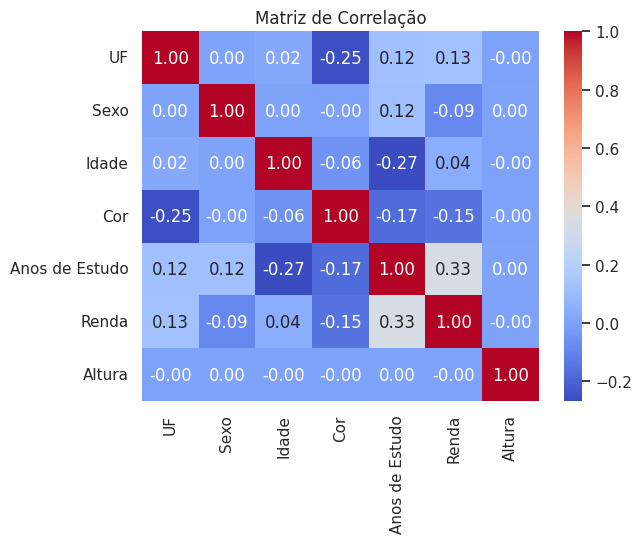

In [70]:
# Matriz de Correlação
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

<ipython-input-71-d8cc6df4c0f5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




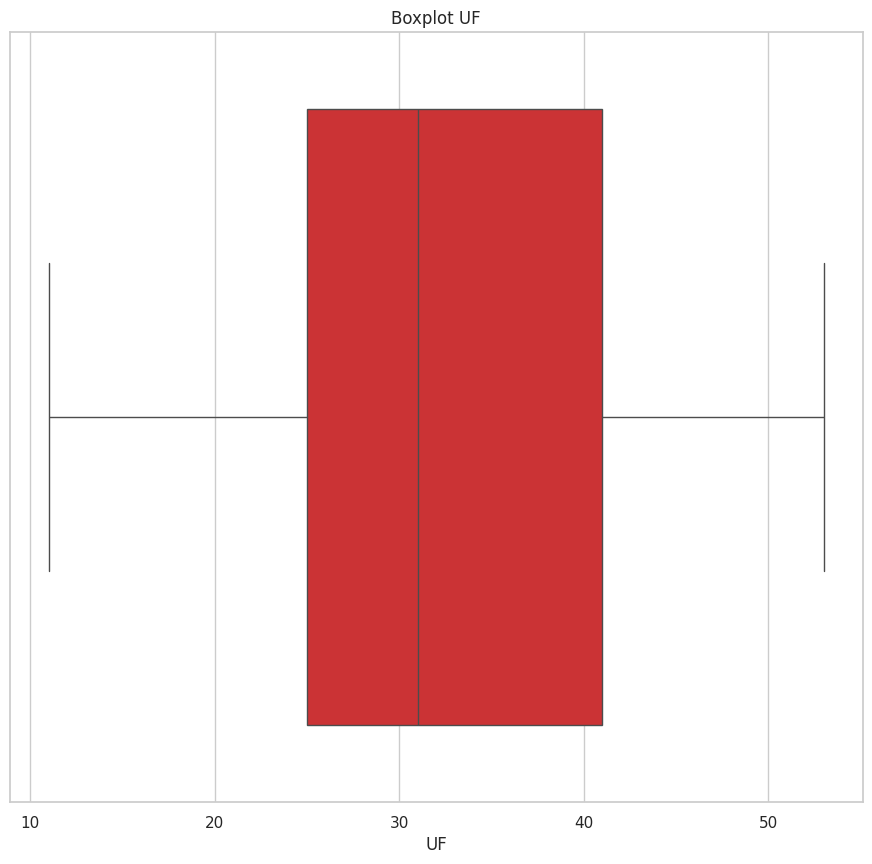

<ipython-input-71-d8cc6df4c0f5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




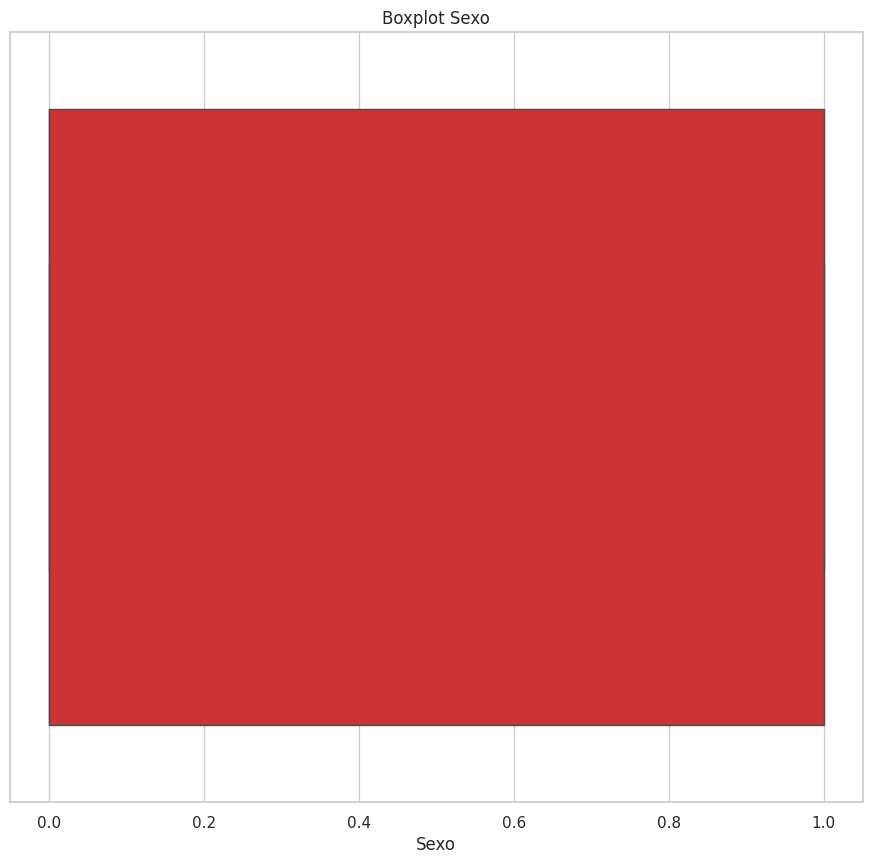

<ipython-input-71-d8cc6df4c0f5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




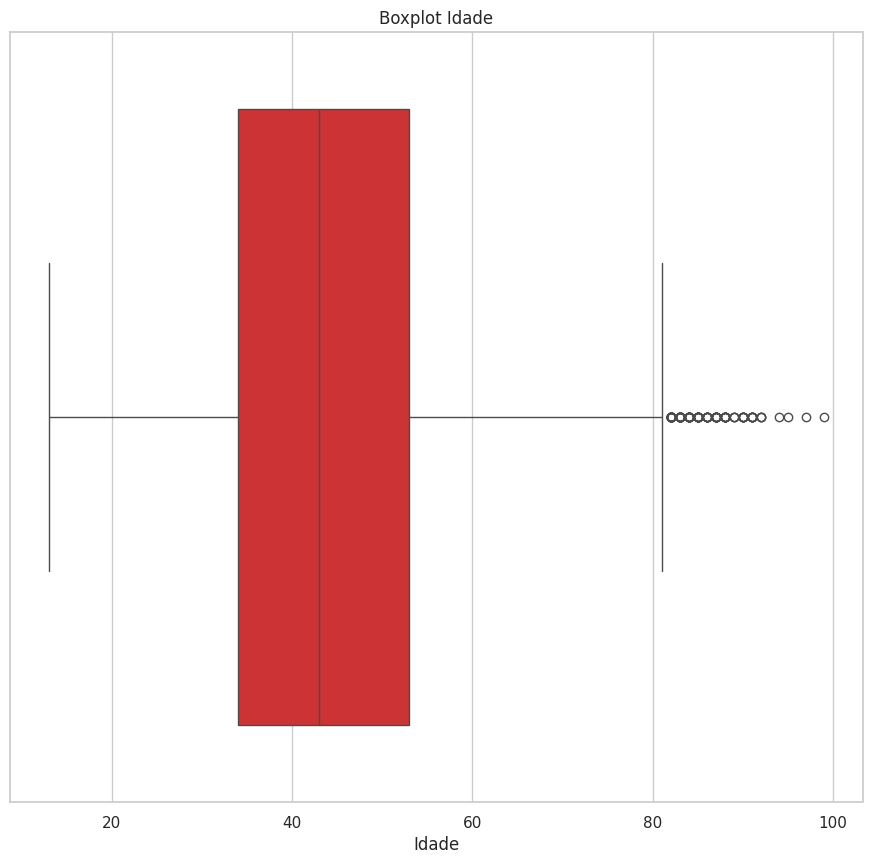

<ipython-input-71-d8cc6df4c0f5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




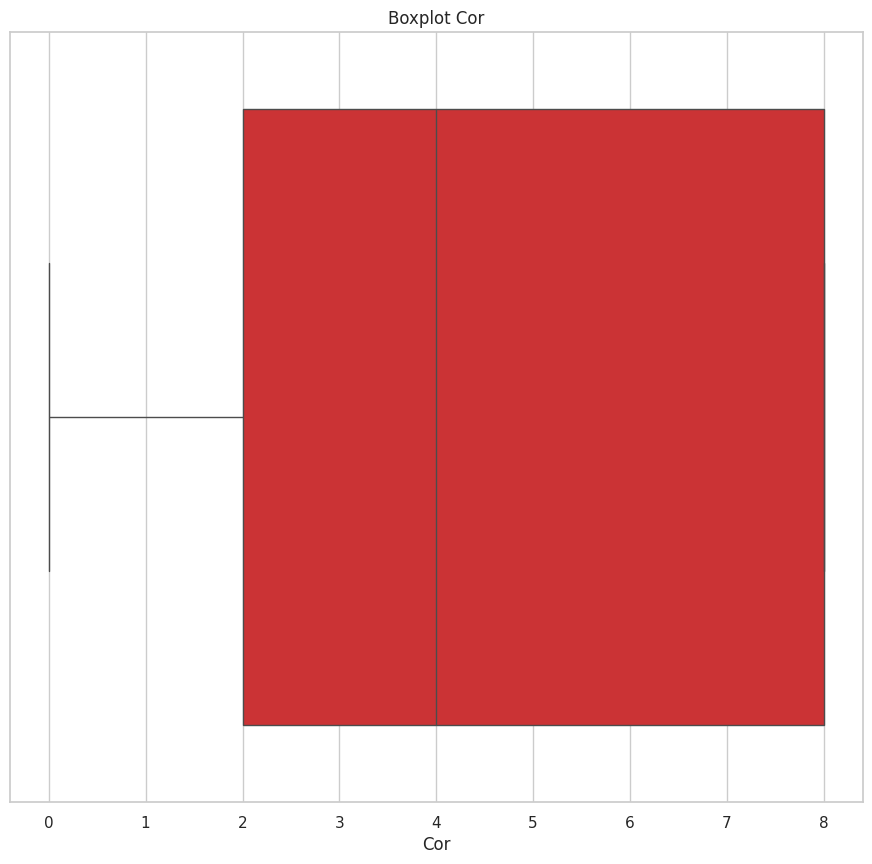

<ipython-input-71-d8cc6df4c0f5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




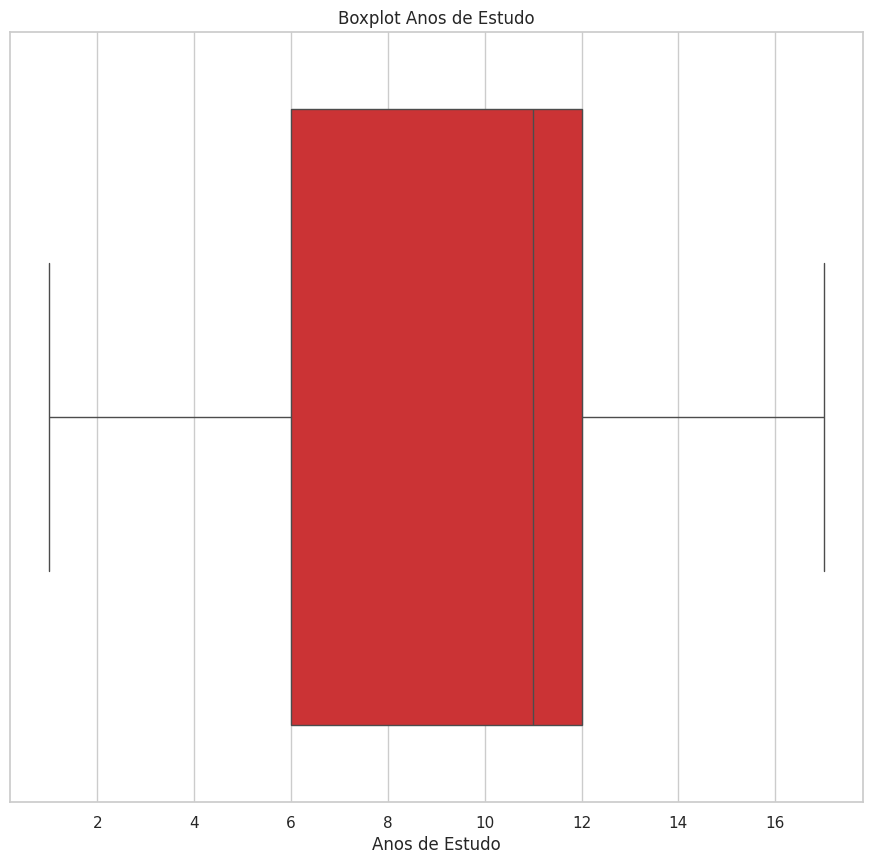

<ipython-input-71-d8cc6df4c0f5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




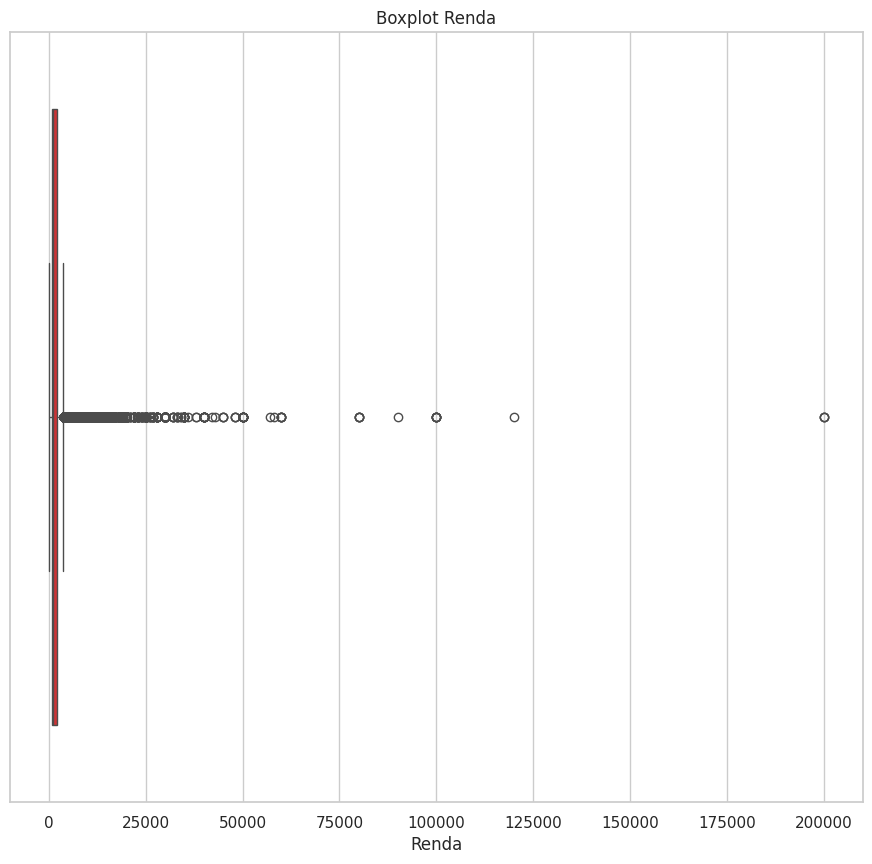

<ipython-input-71-d8cc6df4c0f5>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




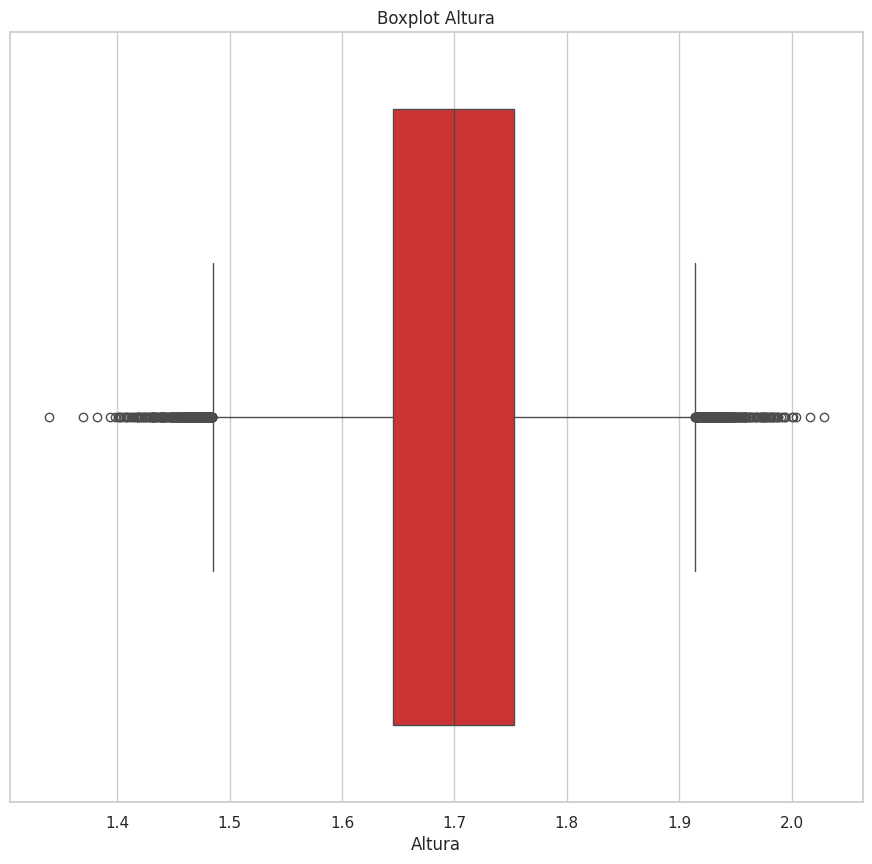

In [71]:
sns.set(style="whitegrid")

# Criando um boxplot para cada uma das variáveis do DataFrame
colunas = df.columns
for val in colunas:

  plt.figure(figsize=(11, 10))
  sns.boxplot(x = val,data=df ,palette="Set1")
  plt.title('Boxplot '+ val)
  plt.show()

<ipython-input-72-04ee21297baf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




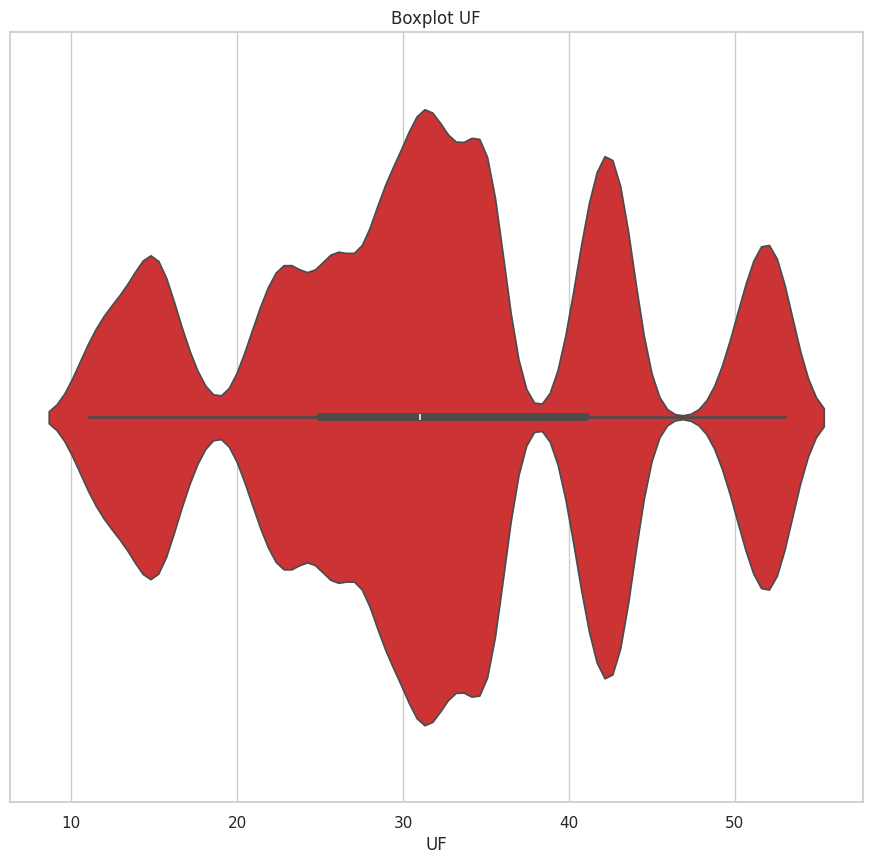

<ipython-input-72-04ee21297baf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




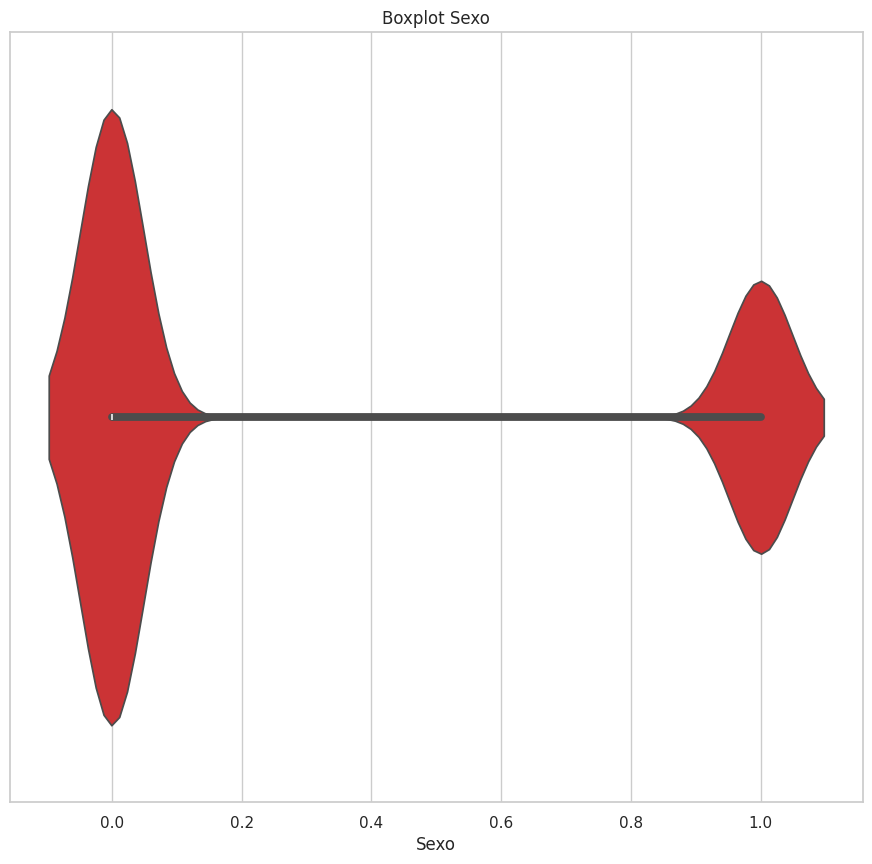

<ipython-input-72-04ee21297baf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




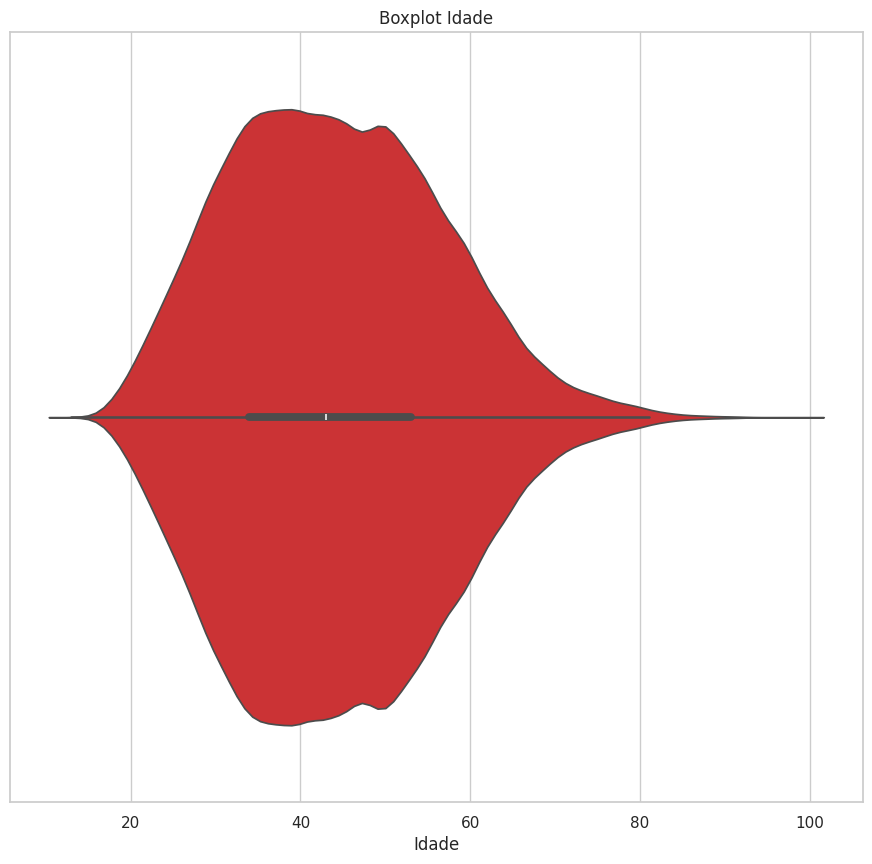

<ipython-input-72-04ee21297baf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




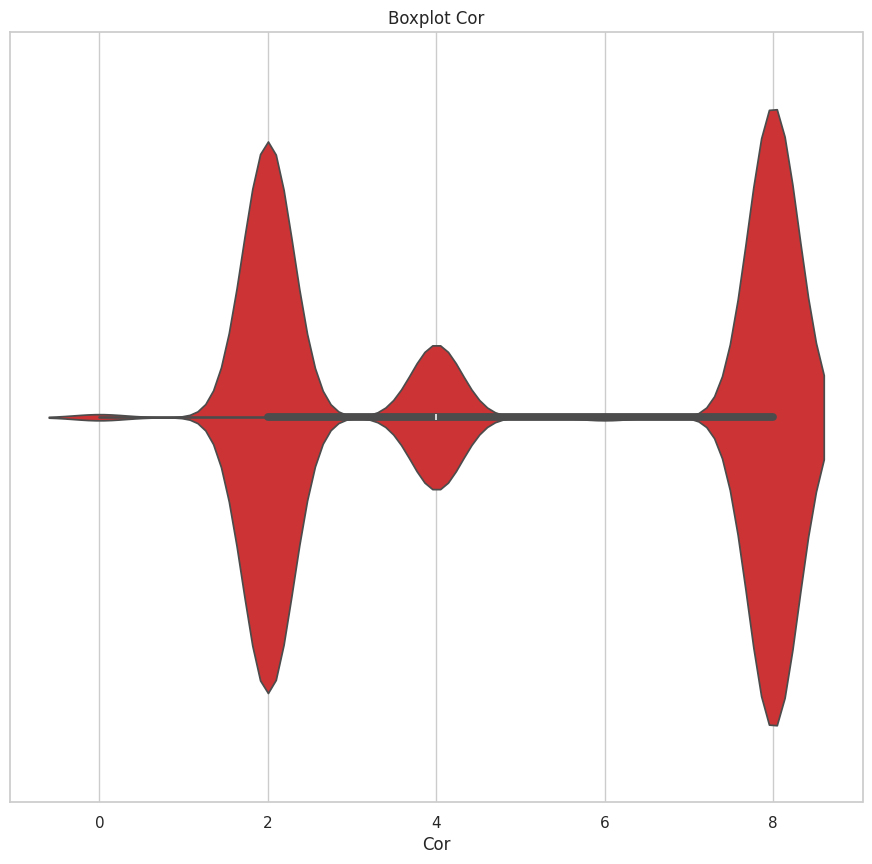

<ipython-input-72-04ee21297baf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




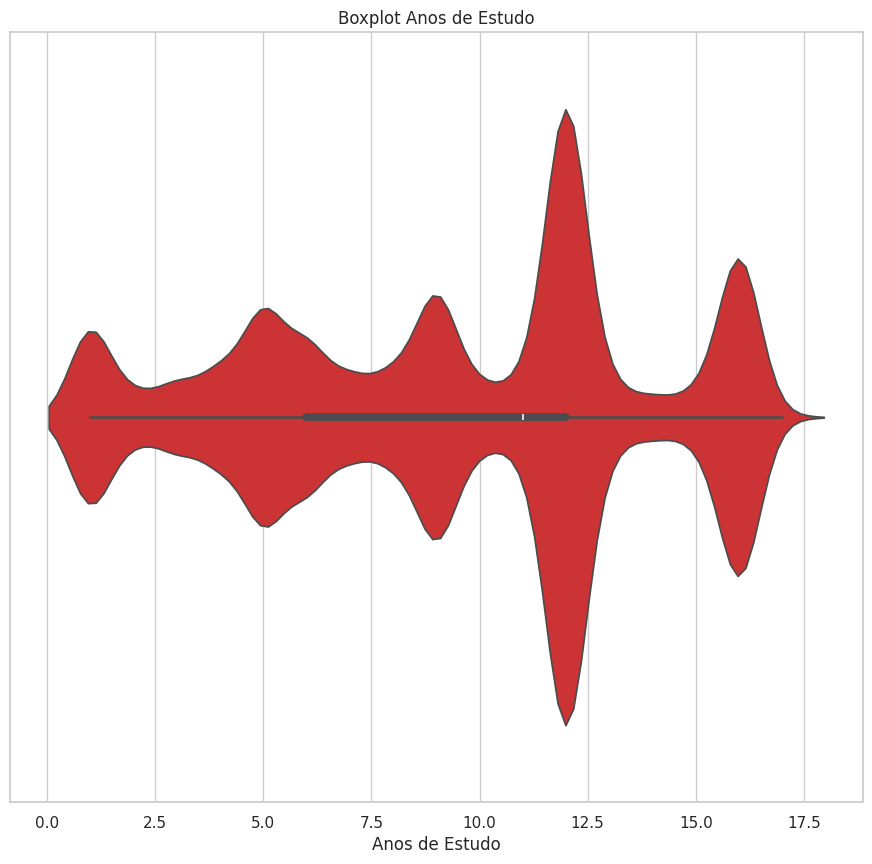

<ipython-input-72-04ee21297baf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




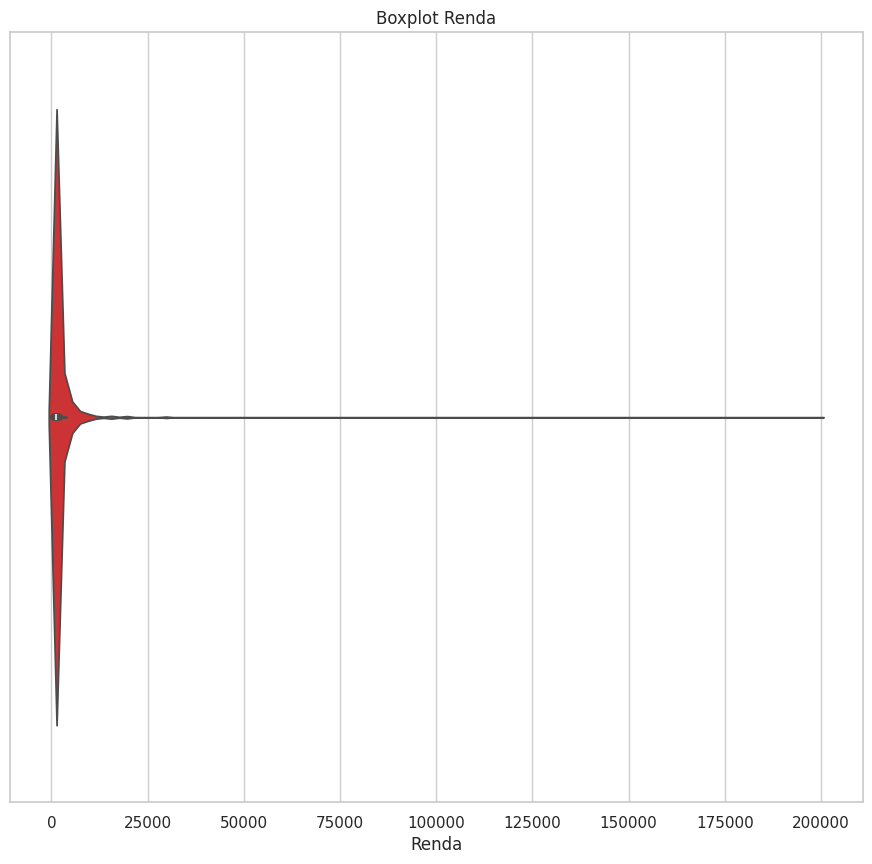

<ipython-input-72-04ee21297baf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




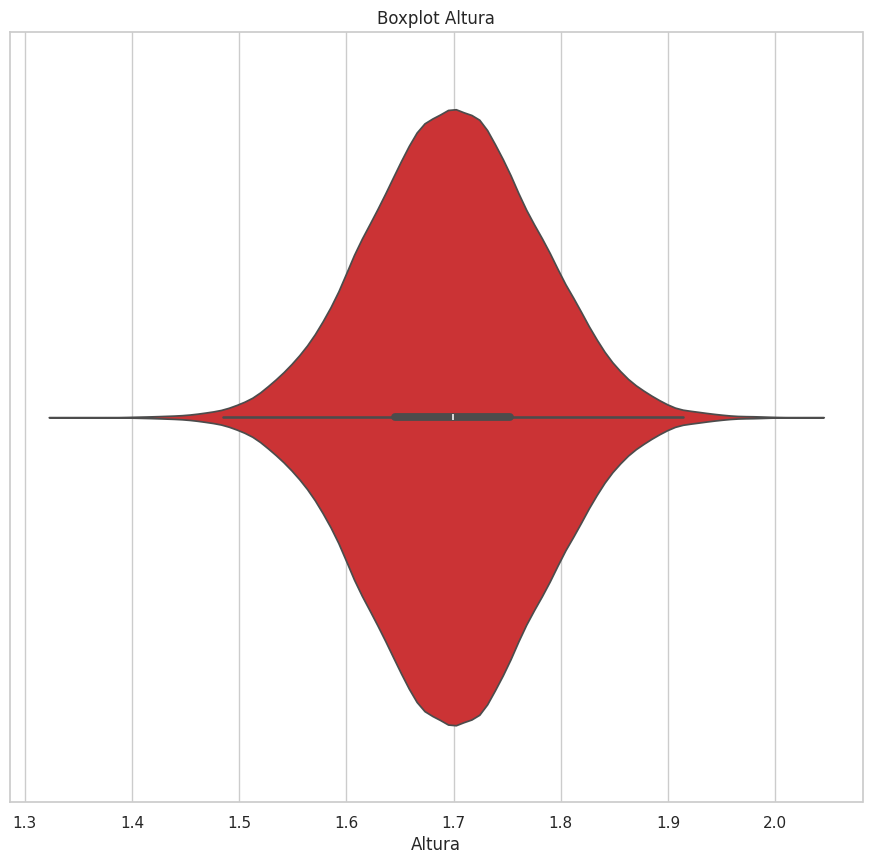

In [72]:
sns.set(style="whitegrid")

# Criando um violinplot para cada uma das variáveis do DataFrame
colunas = df.columns
for val in colunas:

  plt.figure(figsize=(11, 10))
  sns.violinplot(x = val,data=df ,palette="Set1")
  plt.title('Boxplot '+ val)
  plt.show()

In [73]:
#renda media,mediana e o máximo
media = df["Renda"].mean()
mediana = df["Renda"].median()
maximo = df["Renda"].max()
print(f"A media de renda é {media}, a mediana é {mediana} e o máximo é {maximo}")

A media de renda é 2000.3831988547631, a mediana é 1200.0 e o máximo é 200000


In [74]:
# Calculando os quartis da variavel Renda
primeiro_quartil = df['Renda'].quantile(0.25)
segundo_quartil = df['Renda'].quantile(0.5)  # Mediana
terceiro_quartil = df['Renda'].quantile(0.75)

# Exibindo os quartis
print("Primeiro Quartil (Q1):", primeiro_quartil)
print("Segundo Quartil (Q2 ou Mediana):", segundo_quartil)
print("Terceiro Quartil (Q3):", terceiro_quartil)

Primeiro Quartil (Q1): 788.0
Segundo Quartil (Q2 ou Mediana): 1200.0
Terceiro Quartil (Q3): 2000.0


In [75]:
#analises estatisticas de idade
print('Moda: %s, Mediana: %s, Média: %s.' % (int(df.Idade.mode()), int(df.Idade.median()), int(df.Idade.mean())))

Moda: 40, Mediana: 43, Média: 44.


### **4.2) Respondendo algumas perguntas**

#### **4.2.1) Quantas pessoas responderam a pesquisa?**

In [76]:
#quantidade de pessoas que responderam a pesquisa
total_pessoas = df['Sexo'].shape[0]
print(f'{total_pessoas} pessoas responderam a pesquisa.')

76840 pessoas responderam a pesquisa.


#### **4.2.2) Qual a idade máxima e idade minima dos entrevistados?**

In [77]:
idade_minima = df['Idade'].min()
idade_maxima = df['Idade'].max()
print(f'De {idade_minima} a {idade_maxima} anos.')

De 13 a 99 anos.


#### **4.2.3) Qual a renda minima e a maxima na base analisada?**

In [78]:
renda_minima = df['Renda'].min()
renda_maxima = df['Renda'].max()
print(f'De R${renda_minima} a R${renda_maxima} reais.')

De R$0 a R$200000 reais.


#### **4.2.4) Qual a quantidade de respostas por sexo?**

In [79]:
#quantidade de respostas por sexo
frequencia = df['Sexo'].value_counts()
porcentagem = df['Sexo'].value_counts(normalize=True)*100
total = pd.DataFrame({'Frequencia': frequencia,"Porcentagem":porcentagem})
total = total.rename(sexo)
total

,Frequencia,Porcentagem
Masculino,53250,69.299844
Feminino,23590,30.700156


#### **4.2.5) Qual a quantidade de respostas por cor?**

In [80]:
#quantidade de respostas por cor
frequencia = df['Cor'].value_counts()
porcentagem = df['Cor'].value_counts(normalize=True)*100
total = pd.DataFrame({'Frequencia': frequencia,"Porcentagem":porcentagem})
total = total.rename(cor)
total

,Frequencia,Porcentagem
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


#### **4.2.6) Qual a quantidade de respostas por cor para cada sexo?**

In [81]:
#quantidade de respostas por cor para cada sexo
df_atual = pd.crosstab(df["Sexo"],df["Cor"])
df_atual.rename(index = sexo, inplace = True)
df_atual.rename(columns = cor, inplace = True)
df_atual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


#### **4.2.7) Qual a renda média por cor para cada sexo?**

In [82]:
#renda media por cor e sexo
df_atual = pd.crosstab(df["Sexo"],df["Cor"],df["Renda"],aggfunc='mean')
df_atual.rename(index = sexo, inplace = True)
df_atual.rename(columns = cor, inplace = True)
df_atual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### **4.3) Análises Gráficas e estatisticas**

#### **4.3.1) Histograma de distribuição das rendas**

In [83]:
contagem = df['Renda']
contagem.columns = ["Renda"]

fig = px.histogram(contagem, x="Renda",
             labels={"Renda": "Renda"},
             title='Distribuição de renda',
             color_discrete_sequence=['purple']
             )

fig.update_traces(textposition='outside')

#### **4.3.2) Classificação das rendas**

Nessa fase as rendas serão classificadas em diferentes intervalos.
Será utilizada a seguinte classificação:

* A : Acima de 20 SM

* B : De 10 a 20 SM

* C : De 4 a 10 SM

* D : De 2 a 4 SM

* E : Até 2 SM

Onde SM é o valor do salário mínimo na época. No caso desse projeto R$ 788,00 (2015):

* A : Acima de 15.760

* B : De 7.880 a 15.760

* C : De 3.152 a 7.880

* D : De 1.576 a 3.152

* E : Até 1.576

In [84]:
classes = [0, 1576, 3152, 7880, 15760, 200000] # Crindo as classes

labels = ['E', 'D', 'C', 'B', 'A'] # Crindo as categorias

In [85]:
#quantidade de elementos para cada categoria
frequencia_renda = pd.value_counts(
    pd.cut(x = df['Renda'],
       bins = classes,
       labels = labels,
       include_lowest = True)
)
frequencia_renda

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [86]:
# distribuição percentual dos elementos para cada categoria
percentual_renda = pd.value_counts(
    pd.cut(x = df['Renda'],
       bins = classes,
       labels = labels,
       include_lowest = True),
    normalize = True
) * 100
percentual_renda

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [87]:
'''tabela com a frequencia e o percentual de elementos
por categoria de renda'''
distr_freq_quant_renda = pd.DataFrame(
    {'Frequência': frequencia_renda, 'Porcentagem (%)': percentual_renda.round(2)}
)
distr_freq_quant_renda

,Frequência,Porcentagem (%)
E,49755,64.75
D,16700,21.73
C,7599,9.89
B,2178,2.83
A,608,0.79


In [88]:
contagem = distr_freq_quant_renda['Frequência']
contagem.columns = ["Frequência"]

fig = px.bar(contagem, y="Frequência",
             labels={"Frequência": "Frequência"},
             title='Distribuição de renda por categoria',
             color_discrete_sequence=['purple']
             )

fig.update_traces(textposition='outside')

#### **4.3.3) Histograma de distribuição por idade**

In [89]:
contagem = df['Idade']
contagem.columns = ["Idade"]

fig = px.histogram(contagem, x="Idade",
             labels={"Renda": "Renda"},
             title='Distribuição de Idade',
             color_discrete_sequence=['purple']
             )

fig.update_traces(textposition='outside')

#### **4.3.4) Distribuição de renda por estado**

In [90]:
renda_estatisticas_por_uf = df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

É perceptível que o nordeste é o local com a menor renda em comparação aos demais. O Distrito Federal é o estado com a maior renda média, aproximadamente R$ 4.241,95.

#### **4.3.5) Boxplot de renda por sexo**

<ipython-input-91-be8842cac628>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Axes: title={'center': 'Renda por Sexo'}, xlabel='R$', ylabel='Sexo'>

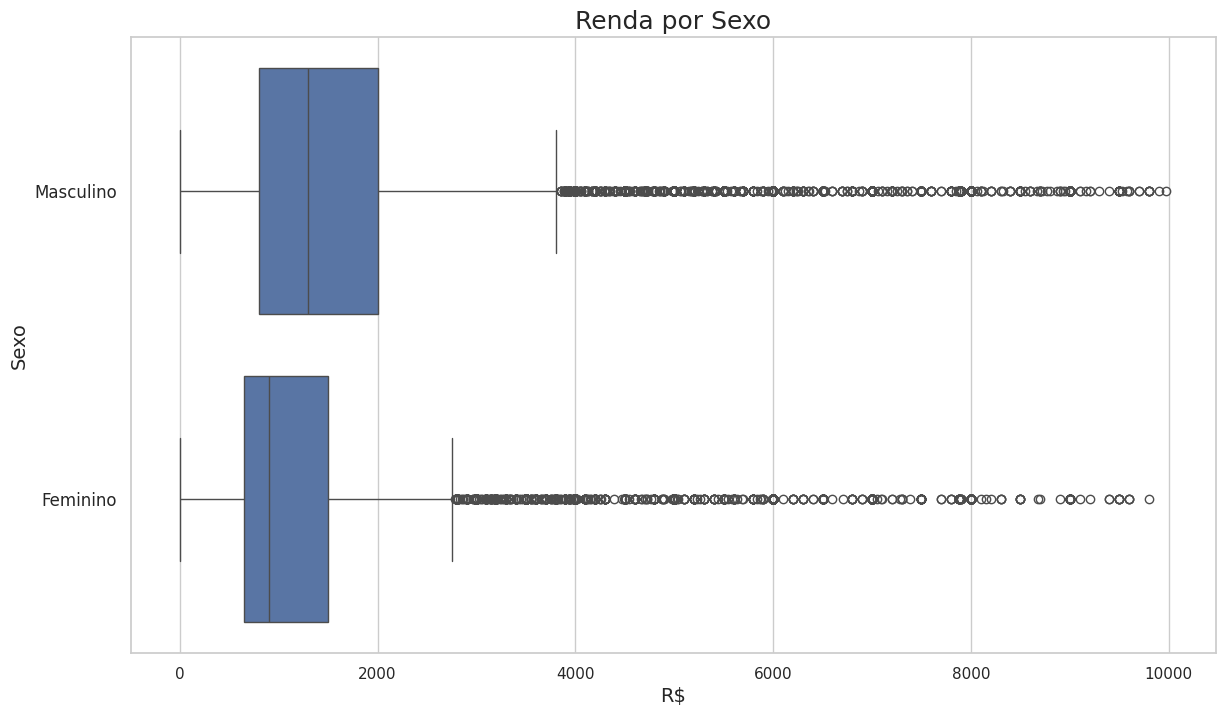

In [91]:
#boxplot de renda por sexo
boxplot_renda = sns.boxplot(x = 'Renda', y = 'Sexo', data = df.query('Renda < 10000'), orient = 'h')

boxplot_renda.figure.set_size_inches(14, 8)
boxplot_renda.set_title('Renda por Sexo', fontsize=18)
boxplot_renda.set_xlabel('R$', fontsize=14)
boxplot_renda.set_ylabel('Sexo', fontsize=14)
boxplot_renda.set_yticklabels(['Masculino', 'Feminino'], fontsize=12)

boxplot_renda

O Boxplot acima compara a renda de homens e mulheres que recebem até R$ 10.000. As linhas centrais dentro das caixas azuis representam a mediana.Assim, é possível Observar que a caixa que representa as mulheres está deslocada para a esquerda em comparação com a dos homens. Portanto, fica evidente que existe uma diferença na renda entre homens e mulheres.

#### **4.3.6) Boxplot de sexo por anos de estudo**

<ipython-input-92-93591128fb5b>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

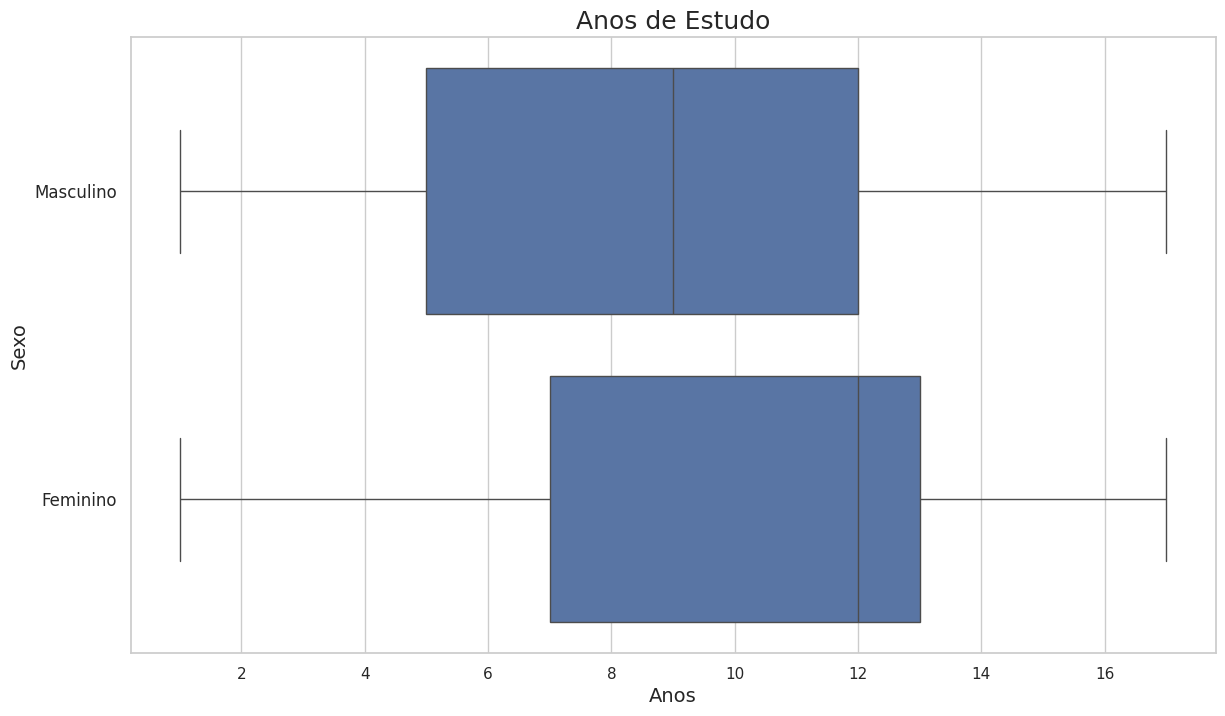

In [92]:
boxplot_estudo = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = df, orient = 'h')

boxplot_estudo.figure.set_size_inches(14, 8)
boxplot_estudo.set_title('Anos de Estudo', fontsize=18)
boxplot_estudo.set_xlabel('Anos', fontsize=14)
boxplot_estudo.set_ylabel('Sexo', fontsize=14)
boxplot_estudo.set_yticklabels(['Masculino', 'Feminino'], fontsize=12)

boxplot_estudo

Obervando o Boxplot acima, é possível notar que as mulheres costumam estudar mais anos que os homens em média, entretanto, possuem uma renda inferior.

#### **4.3.7) Boxplot de rendas por sexo e anos de estudo**

<ipython-input-93-c56f971eee7d>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Axes: title={'center': 'Boxplot da Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

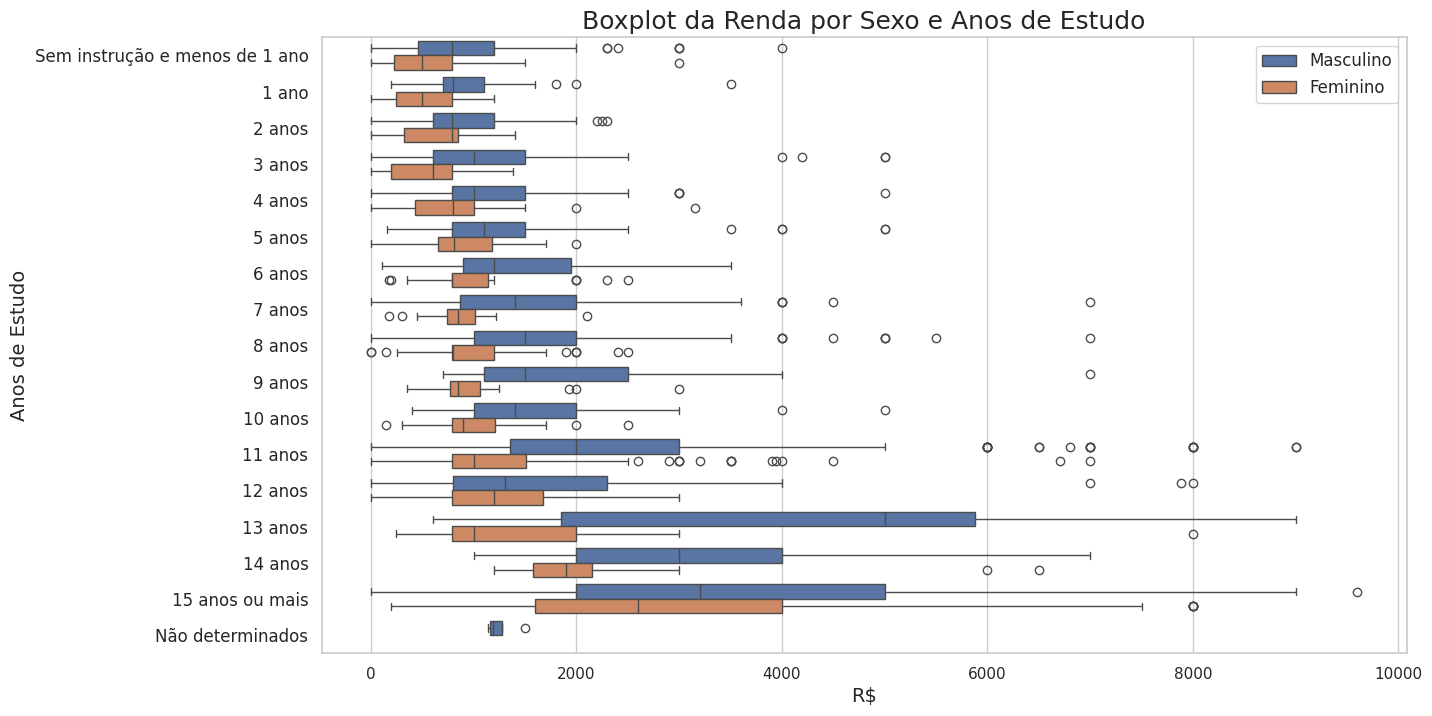

In [93]:
boxplot_RAS = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=df.query('Renda < 10000 and Idade == 50'), orient='h')

boxplot_RAS.figure.set_size_inches(14, 8)

boxplot_RAS.set_title('Boxplot da Renda por Sexo e Anos de Estudo', fontsize=18)

boxplot_RAS.set_xlabel('R$', fontsize=14)

boxplot_RAS.set_ylabel('Anos de Estudo', fontsize=14)
boxplot_RAS.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)

# Configurações da legenda do gráfico (Sexo)
handles, _ = boxplot_RAS.get_legend_handles_labels()
boxplot_RAS.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

boxplot_RAS

Observando o Boxplot acima, conclui-se que em varias distribuições de anos as mulheres estudam mais que homens, porém, acabam ganhando menos.

#### **4.3.8) Boxplot de renda por sexo e cor**

<ipython-input-94-f2a345ad776f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Axes: title={'center': 'Boxplot da Renda por Sexo e Cor'}, xlabel='R$', ylabel='Cor'>

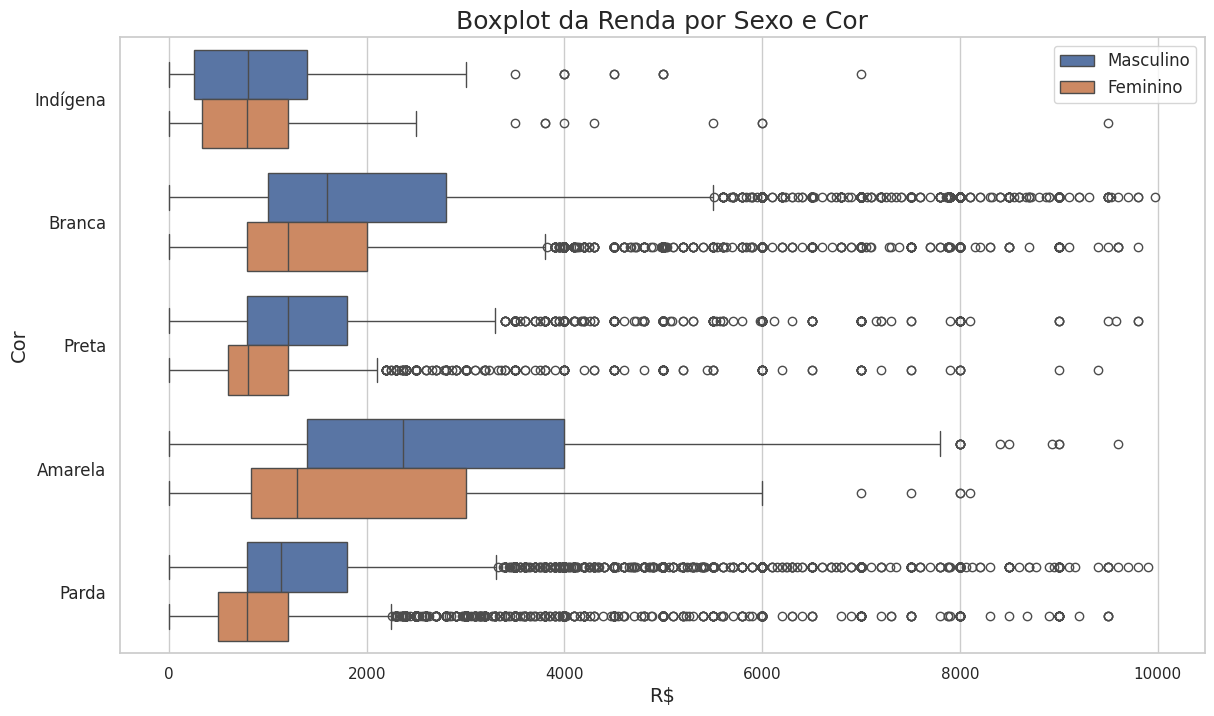

In [94]:
boxplot_RSC = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=df.query('Renda < 10000'), orient='h')

boxplot_RSC.figure.set_size_inches(14, 8)
boxplot_RSC.set_title('Boxplot da Renda por Sexo e Cor', fontsize=18)

boxplot_RSC.set_xlabel('R$', fontsize=14)

boxplot_RSC.set_ylabel('Cor', fontsize=14)
boxplot_RSC.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)

handles, _ = boxplot_RSC.get_legend_handles_labels()
boxplot_RSC.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

boxplot_RSC

Observando o Boxplot acima,conclui-se que indigenas, pardos e pretos tem os menores salários e em varias distribuições por cor a diferença salarial entre homens e mulheres é notável.

### **4.4) Algumas probabilidades**

In [95]:
# calculando a probabilidade de mulheres receberem mais do que homens
mulheres = df[df['Sexo'] == 1]


homens = df[df['Sexo'] == 0]

renda_media_homens = homens['Renda'].mean()


mulheres_com_renda_maior_que_media_homens = mulheres[mulheres['Renda'] > renda_media_homens]

probabilidade = len(mulheres_com_renda_maior_que_media_homens) / len(mulheres)

print(f"Probabilidade de uma mulher ganhar mais que um homem:{round(probabilidade*100,2)}%")

Probabilidade de uma mulher ganhar mais que um homem:16.54%


In [96]:
''' calculando  a probabilidade de alguém com
mais de 10 anos de estudo ganhar menos do que algúem com
até dois anos de estudo'''

mais_de_10_anos = df[df['Anos de Estudo'] > 10]


dois_anos = df[df['Anos de Estudo'] == 2]


renda_media_dois_anos = dois_anos['Renda'].mean()

menos_de_dois_anos = mais_de_10_anos[mais_de_10_anos['Renda'] < renda_media_dois_anos]

probabilidade = len(menos_de_dois_anos) / len(mais_de_10_anos)

print(f"Probabilidade de alguém com mais de 10 anos de estudo ganhar menos do que alguém com 2 anos de estudo:{round(probabilidade*100,2)}%", )

Probabilidade de alguém com mais de 10 anos de estudo ganhar menos do que alguém com 2 anos de estudo:16.88%


In [97]:
''' calculando a probabilidade de alguém com idade
de 35 a 45 anos não receber nada'''
idade_25_45 = df[(df['Idade'] >= 35) & (df['Idade'] <= 45)]


sem_renda = idade_25_45[idade_25_45['Renda'] == 0]


probabilidade = len(sem_renda) / len(idade_25_45)

print(f"Probabilidade de alguém com idade entre 35 e 45 anos não receber nada:{round(probabilidade*100,2)}%")

Probabilidade de alguém com idade entre 35 e 45 anos não receber nada:1.72%


### **3) Conclusão**
A análise dos dados da pesquisa PNAD de 2015 revelou tendências marcantes. Os menores rendimentos foram observados entre aqueles que se autodeclararam pretos e indígenas, com concentração particularmente significativa na região nordeste do país. Em contraste, Brasília emergiu como o local com o salário médio mais elevado.

Além disso, destacou-se uma disparidade salarial entre os gêneros em todos os estratos demográficos, independentemente da etnia. Surpreendentemente, mesmo com as mulheres apresentando uma média de anos de estudo superior à dos homens, elas continuam recebendo menos.

Em relação à idade, os rendimentos mais altos geralmente estão associados à faixa etária de 35 a 45 anos.